In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler   #정규화(정해진 규칙 기준, min-max)

import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
# cross_val_score: 다양한 샘플링을 해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [194]:
## estimator, model, 알고리즘, classifier

In [195]:
mnist=datasets.load_digits()

In [196]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [197]:
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [198]:
features, labels= mnist.data, mnist.target

In [199]:
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [200]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [201]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, test_size=0.2)

In [202]:
X_train.shape

(1437, 64)

In [203]:
## 싱글 모델

In [204]:
dtree=DecisionTreeClassifier(
    criterion='gini',
    max_depth=16,
    random_state=35
)

In [205]:
knn=KNeighborsClassifier(
    n_neighbors=299,
    n_jobs=None
)

In [206]:
svm=SVC(
    C=0.1,
    kernel='rbf',
    gamma=0.003,
    probability=True # 각 라벨링 값으로 될 가능성 구해주세요.
)

In [207]:
dtree.fit(X_train, y_train)
dtree_predicted=dtree.predict(X_test)

In [208]:
knn.fit(X_train, y_train)
knn_predicted=knn.predict(X_test)

In [209]:
svm.fit(X_train, y_train)
svm_predicted=svm.predict(X_test)

In [210]:
print('Accuracy')
print('dtree >>', accuracy_score(y_test, dtree_predicted))
print('knn >>', accuracy_score(y_test, knn_predicted))
print('svm >>', accuracy_score(y_test, svm_predicted))

Accuracy
dtree >> 0.8361111111111111
knn >> 0.8555555555555555
svm >> 0.925


In [211]:
dtree_proba=dtree.predict_proba(X_test)
dtree_proba[:2]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [224]:
np.argmax(dtree_proba[0]), np.argmin(dtree_proba[0])

(7, 0)

In [212]:
knn_proba=knn.predict_proba(X_test)
knn_proba[:2]

array([[0.        , 0.07023411, 0.10702341, 0.16053512, 0.0367893 ,
        0.09364548, 0.        , 0.25752508, 0.22742475, 0.04682274],
       [0.090301  , 0.0735786 , 0.01003344, 0.02675585, 0.05685619,
        0.07692308, 0.46153846, 0.        , 0.13712375, 0.06688963]])

In [222]:
np.argmax(knn_proba[0]), np.argmin(knn_proba[0])

(7, 0)

In [213]:
svm_proba=svm.predict_proba(X_test)
svm_proba[:2]

array([[4.38141850e-03, 1.09903229e-02, 1.33799490e-02, 1.16374129e-02,
        8.05435097e-03, 5.38181785e-03, 4.57613170e-03, 8.14495098e-01,
        1.20681682e-01, 6.42181536e-03],
       [4.26967209e-04, 1.93240709e-04, 1.72660053e-04, 2.02229133e-04,
        2.20171352e-04, 2.04737637e-04, 9.97488310e-01, 3.09962455e-04,
        5.38843141e-04, 2.42878723e-04]])

In [223]:
np.argmax(svm_proba[0]), np.argmin(svm_proba[0])

(7, 0)

In [214]:
dtree_proba=dtree.predict_proba(X_test)
dtree_proba[:2] # 5, 2

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [215]:
## 앙상블 모델

In [234]:
## 하드 보팅
voting_clf_h=VotingClassifier(
    estimators=[('decision tree',dtree),('knn',knn),('svm',svm)],
    voting='hard',
    weights=[1,1,1]
)

In [236]:
voting_clf_h.fit(X_train, y_train)
hard_voting_predicted=voting_clf_h.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9416666666666667

In [237]:
## dtree:2, knn:2, svm:1 ==> 2(2) 1(1)  ==> 다수결의 원칙에 따라 2로 판단

In [238]:
hard_voting_predicted[[1,50]]

array([6, 5])

In [217]:
## 소프트 보팅
voting_clf_s=VotingClassifier(
    estimators=[('decision tree',dtree),('knn',knn),('svm',svm)],
    voting='soft',
    weights=[1,1,1]
)

In [239]:
voting_clf_s.fit(X_train, y_train)
soft_voting_predicted=voting_clf_s.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.8972222222222223

In [241]:
### 그래프로 그려보세요. accuracy(dtree, knn, svm, hard voting, soft voting)

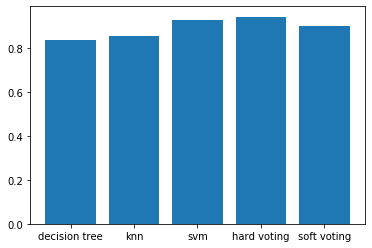

In [248]:
x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);